<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Prediction-Accuracy-(Comparison-of-all-users-predictions-with-model-trained-on-50-users)" data-toc-modified-id="Prediction-Accuracy-(Comparison-of-all-users-predictions-with-model-trained-on-50-users)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction Accuracy (Comparison of all users predictions with model trained on 50 users)</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Benchmark</a></span></li></ul></li><li><span><a href="#Accuracy-for-all-guesses" data-toc-modified-id="Accuracy-for-all-guesses-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Accuracy for all guesses</a></span><ul class="toc-item"><li><span><a href="#All-guesses-accuracy-(PDF)" data-toc-modified-id="All-guesses-accuracy-(PDF)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>All guesses accuracy (PDF)</a></span></li><li><span><a href="#All-guesses-accuracy-(CDF)" data-toc-modified-id="All-guesses-accuracy-(CDF)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>All guesses accuracy (CDF)</a></span></li><li><span><a href="#All-guesses-accuracy-(Boxplot)" data-toc-modified-id="All-guesses-accuracy-(Boxplot)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>All guesses accuracy (Boxplot)</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn" data-toc-modified-id="Accuracy-by-turn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Accuracy by turn</a></span><ul class="toc-item"><li><span><a href="#Accuracy-by-turn-(single-user)" data-toc-modified-id="Accuracy-by-turn-(single-user)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Accuracy by turn (single user)</a></span><ul class="toc-item"><li><span><a href="#First-trained-user" data-toc-modified-id="First-trained-user-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>First trained user</a></span></li><li><span><a href="#Mid-point-trained-user" data-toc-modified-id="Mid-point-trained-user-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Mid-point trained user</a></span></li><li><span><a href="#Last-trained-user" data-toc-modified-id="Last-trained-user-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>Last trained user</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn-(mean-of-all-users)" data-toc-modified-id="Accuracy-by-turn-(mean-of-all-users)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Accuracy by turn (mean of all users)</a></span></li></ul></li><li><span><a href="#Accuracy-by-game-stages" data-toc-modified-id="Accuracy-by-game-stages-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Accuracy by game stages</a></span><ul class="toc-item"><li><span><a href="#Opening-accuracy" data-toc-modified-id="Opening-accuracy-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Opening accuracy</a></span></li><li><span><a href="#Middlegame-accuracy" data-toc-modified-id="Middlegame-accuracy-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Middlegame accuracy</a></span></li><li><span><a href="#Endgame-accuracy-(Upper-limit-at-100-turns)" data-toc-modified-id="Endgame-accuracy-(Upper-limit-at-100-turns)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Endgame accuracy (Upper limit at 100 turns)</a></span></li><li><span><a href="#Endgame-accuracy-(No-upper-limit-for-turns)" data-toc-modified-id="Endgame-accuracy-(No-upper-limit-for-turns)-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Endgame accuracy (No upper limit for turns)</a></span></li><li><span><a href="#Game-stages-comparison-(Boxplot)" data-toc-modified-id="Game-stages-comparison-(Boxplot)-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Game stages comparison (Boxplot)</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#OS libs
import os
# File management
from util_functions.file_management import (filter_by, sort_by, split_pred, split_data)
from util_functions.plot_predictions import (get_stats_for_all_predictions,
                                             plot_pdf_multiple_users,
                                             plot_cdf_multiple_users,
                                             plot_boxplot_multiple_users,
                                             get_stats_for_predictions_by_turn,
                                             plot_single_acc_by_turn,
                                             get_mean_of_predictions_by_turn,
                                             get_predictions_by_game_stage_from_turn,
                                             boxplot_game_stages, boxplot_game_stages_w_benchmark)
#Data handling libs
import pandas as pd
# Meta-data
data_folder = os.path.join(os.getcwd(),'dt_chess','datasets')
losses_folder = os.path.join(os.getcwd(),'dt_chess','training_losses')
dt_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_predictions')
benchmark_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_benchmark')
pred_files = os.listdir(dt_pred_folder)
bench_pred_files = os.listdir(benchmark_pred_folder)
model_size = 400
all_acc_stats = ["top_1_accuracy", "engine_choice_2_accuracy", "engine_choice_3_accuracy",
                 "top_2_accuracy", "top_3_accuracy"]
top_k_acc = ["top_1_accuracy", "top_2_accuracy", "top_3_accuracy"]
all_acc_stats_bench = ["benchmark_top_1_accuracy", "benchmark_engine_choice_2_accuracy",
                 "benchmark_engine_choice_3_accuracy", "benchmark_top_2_accuracy",
                 "benchmark_top_3_accuracy"]
top_k_acc_bench = ["benchmark_top_1_accuracy", "benchmark_top_2_accuracy", "benchmark_top_3_accuracy"]
hist_stat='count'

# Prediction Accuracy (Comparison of all users predictions with model trained on 50 users)

## Descriptive statistics

### Model

In [17]:
pred_files_model = filter_by(pred_files, split_pred, num_users=model_size)
pred_files_model = sort_by(pred_files_model, split_pred, [('username', True), ('user_id', True)])
pred_files_model[-5:]

['convolutional_400_3_Mikola62_1.csv',
 'convolutional_400_2_Bandera666_1.csv',
 'convolutional_400_1_Davigator_1.csv',
 'convolutional_400_0_DOC57_1.csv',
 'convolutional_400_0_BenAL_1.csv']

In [18]:
model_stats_df = get_stats_for_all_predictions(dt_pred_folder, pred_files_model, data_folder)
model_stats_df.index += 1
display(model_stats_df.head().style.format(thousands=','))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [42:54<00:00,  6.44s/it]


In [19]:
model_stats_df.describe()[all_acc_stats]

top_1_accuracy  engine_choice_2_accuracy  engine_choice_3_accuracy  \
count      400.000000                400.000000                400.000000   
mean        30.537985                 14.972841                  9.353345   
std          1.663250                  0.464582                  0.212169   
min         24.945700                 13.576989                  8.773190   
25%         29.469187                 14.666008                  9.215960   
50%         30.614079                 14.959611                  9.345242   
75%         31.752494                 15.283616                  9.470394   
max         36.520455                 16.107901                 10.095507   

       top_2_accuracy  top_3_accuracy  
count      400.000000      400.000000  
mean        45.510825       54.864171  
std          2.024761        2.123703  
min         39.065520       48.198065  
25%         44.127136       53.390228  
50%         45.561233       54.853388  
75%         47.045348       56.443155  
max         52.312877       61.533825

In [24]:
model_stats_df[model_stats_df['top_1_accuracy'] > 34]

total     fp    tp1    tp2    tp3     tn1     tn2    tn3  \
55   143903   8649  50269  22991  13829   93634   70643  56814   
76   133538   6731  46234  20827  12450   87304   66477  54027   
385  244100  13044  84111  38282  23238  159989  121707  98469   
400  117797   5485  43020  18603  10862   74777   56174  45312   

     top_1_accuracy  engine_choice_2_accuracy  engine_choice_3_accuracy  \
55        34.932559                 15.976734                  9.609946   
76        34.622355                 15.596310                  9.323189   
385       34.457599                 15.682917                  9.519869   
400       36.520455                 15.792423                  9.220948   

     top_2_accuracy  top_3_accuracy  
55        50.909293       60.519239  
76        50.218664       59.541853  
385       50.140516       59.660385  
400       52.312877       61.533825

### Benchmark

In [25]:
bench_pred_files_model = sort_by(bench_pred_files, split_data, [('user_id', True)])[:model_size]
bench_stats_df = get_stats_for_all_predictions(benchmark_pred_folder, bench_pred_files_model,
                                               data_folder, split_type=split_data)
bench_stats_df.index += 1
display(bench_stats_df.head().style.format(thousands=','))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [34:48<00:00,  5.22s/it]


In [26]:
for i in range(len(all_acc_stats)):
    bench_stats_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]}, inplace=True)
bench_stats_df.describe()[all_acc_stats_bench]

benchmark_top_1_accuracy  benchmark_engine_choice_2_accuracy  \
count                400.000000                          400.000000   
mean                  49.884464                           18.957104   
std                    2.307864                            0.308092   
min                   37.132254                           17.316881   
25%                   48.736387                           18.793373   
50%                   50.219597                           18.984782   
75%                   51.427448                           19.154916   
max                   54.483851                           19.712160   

       benchmark_engine_choice_3_accuracy  benchmark_top_2_accuracy  \
count                          400.000000                400.000000   
mean                             9.717609                 68.841568   
std                              0.219667                  2.496976   
min                              9.096280                 54.449135   
25%                              9.568524                 67.636121   
50%                              9.709124                 69.256363   
75%                              9.843656                 70.548373   
max                             10.628378                 73.499672   

       benchmark_top_3_accuracy  
count                400.000000  
mean                  78.559176  
std                    2.358747  
min                   64.435682  
25%                   77.547558  
50%                   79.015680  
75%                   80.139980  
max                   82.638330

## Accuracy for all guesses

### All guesses accuracy (PDF)

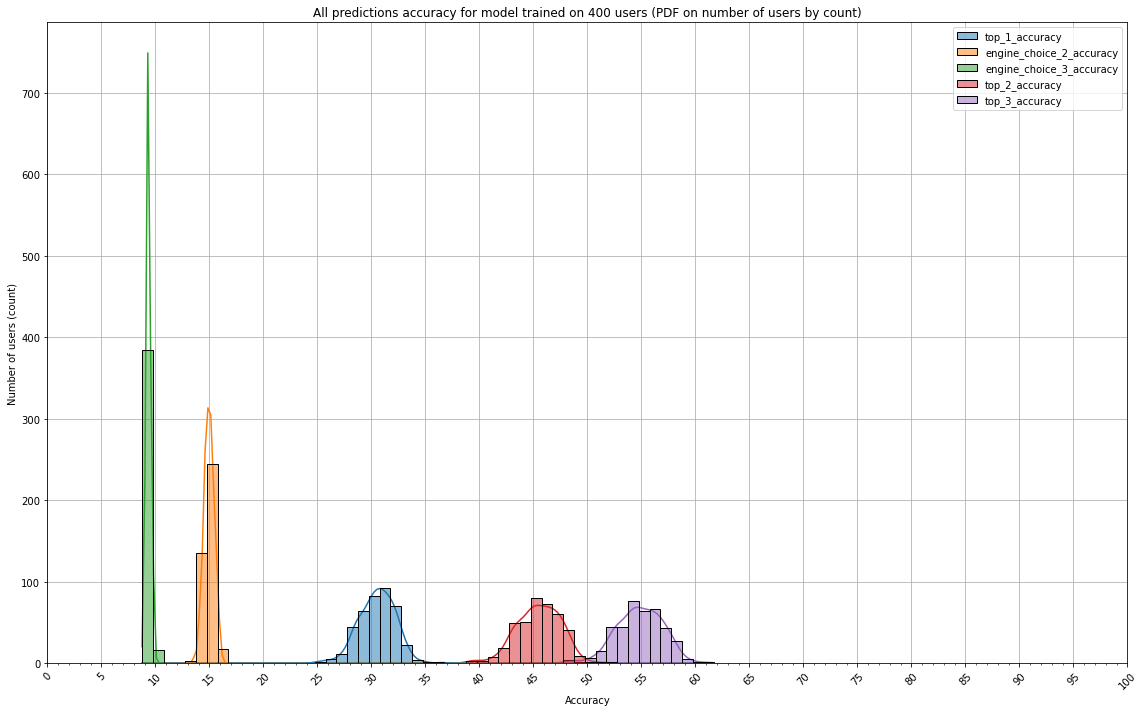

In [27]:
%matplotlib inline
plot_pdf_multiple_users(model_stats_df, all_acc_stats, hist_stat=hist_stat)

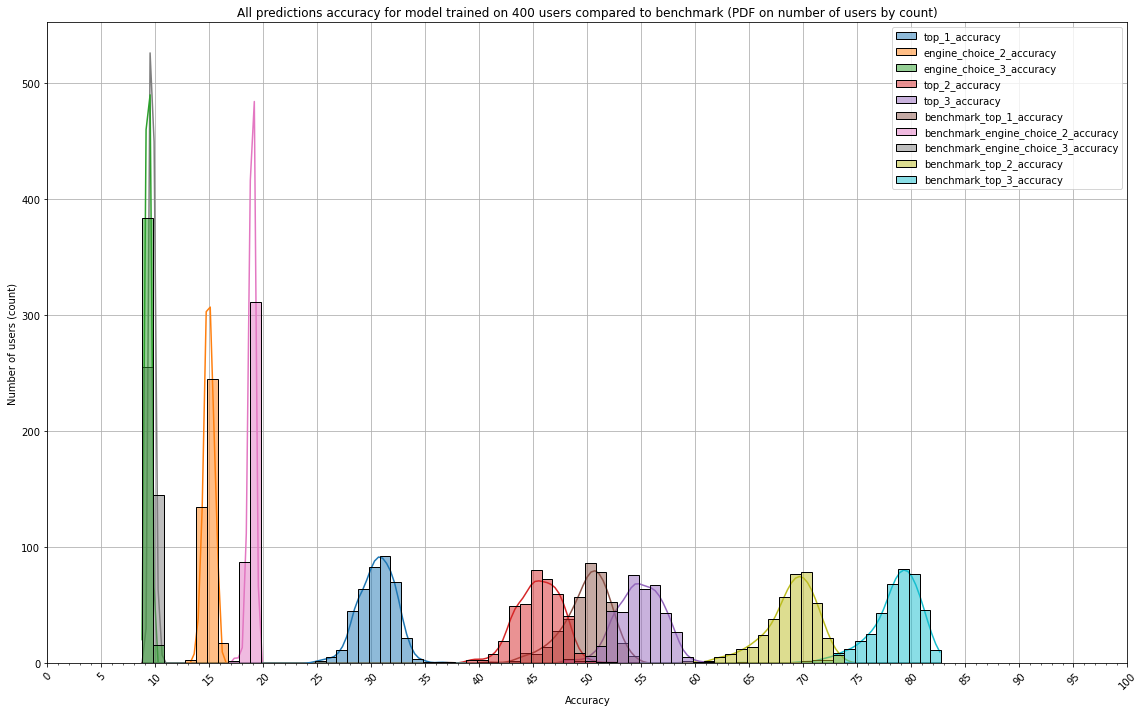

In [28]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        all_acc_stats + all_acc_stats_bench, hist_stat=hist_stat,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark "
                               f"(PDF on number of users by {hist_stat})"))

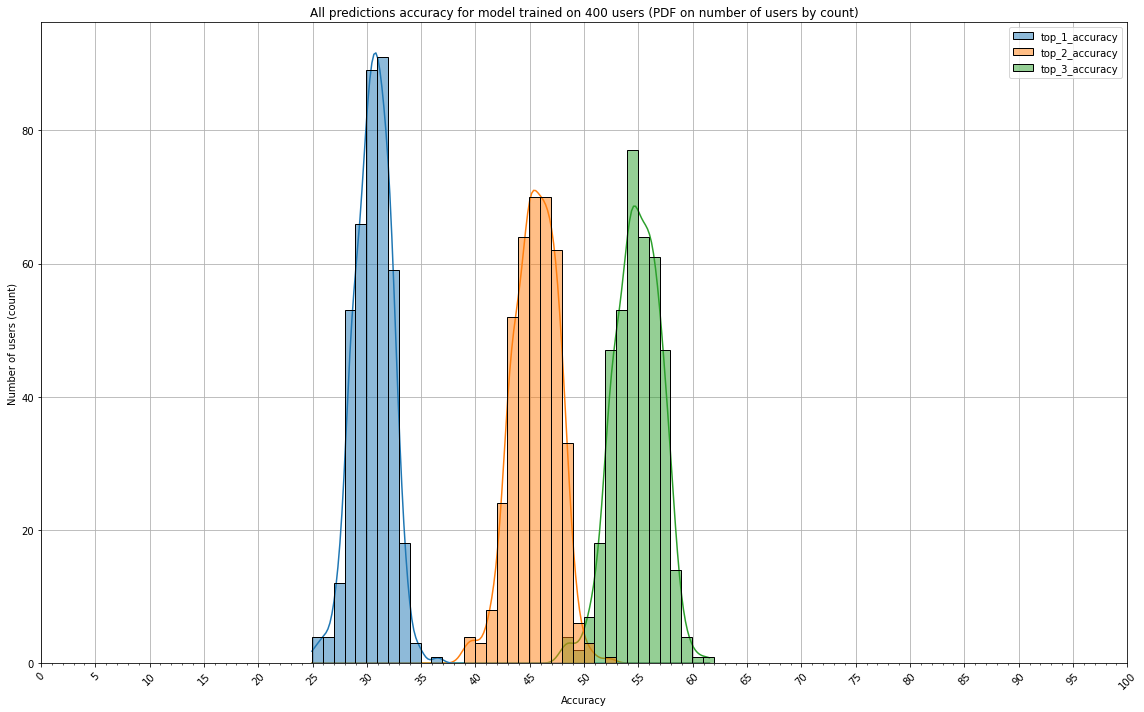

In [29]:
%matplotlib inline
plot_pdf_multiple_users(model_stats_df, top_k_acc, hist_stat=hist_stat)

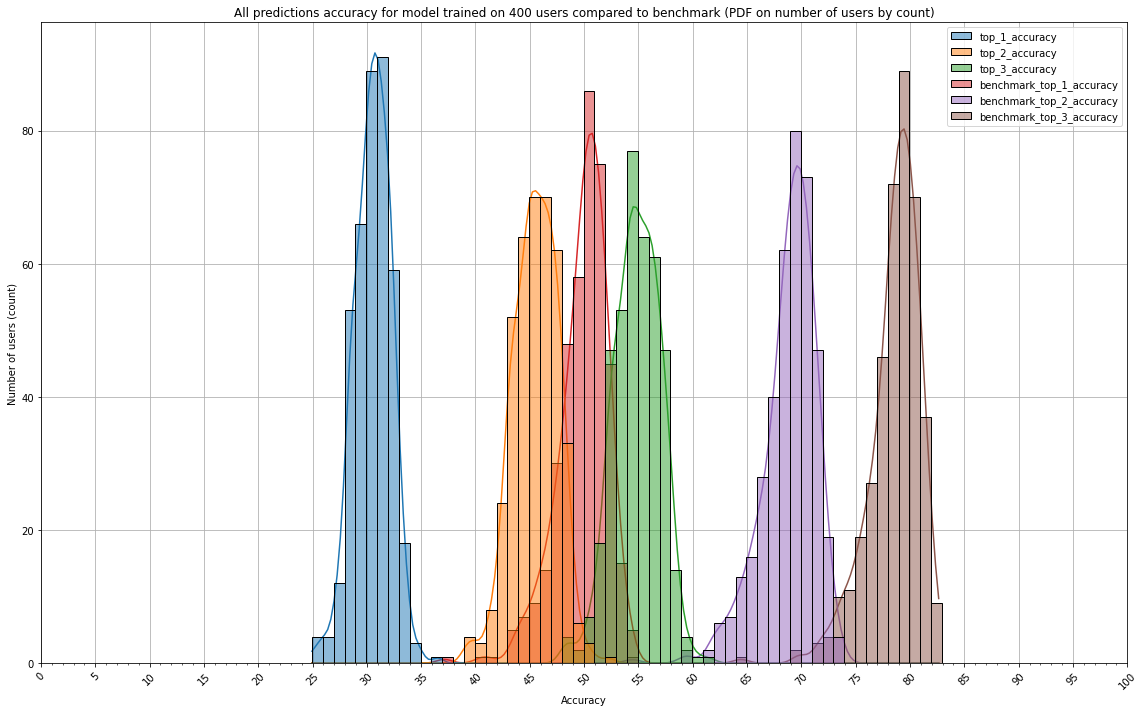

In [30]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        top_k_acc + top_k_acc_bench, hist_stat=hist_stat,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark "
                               f"(PDF on number of users by {hist_stat})"))

### All guesses accuracy (CDF)

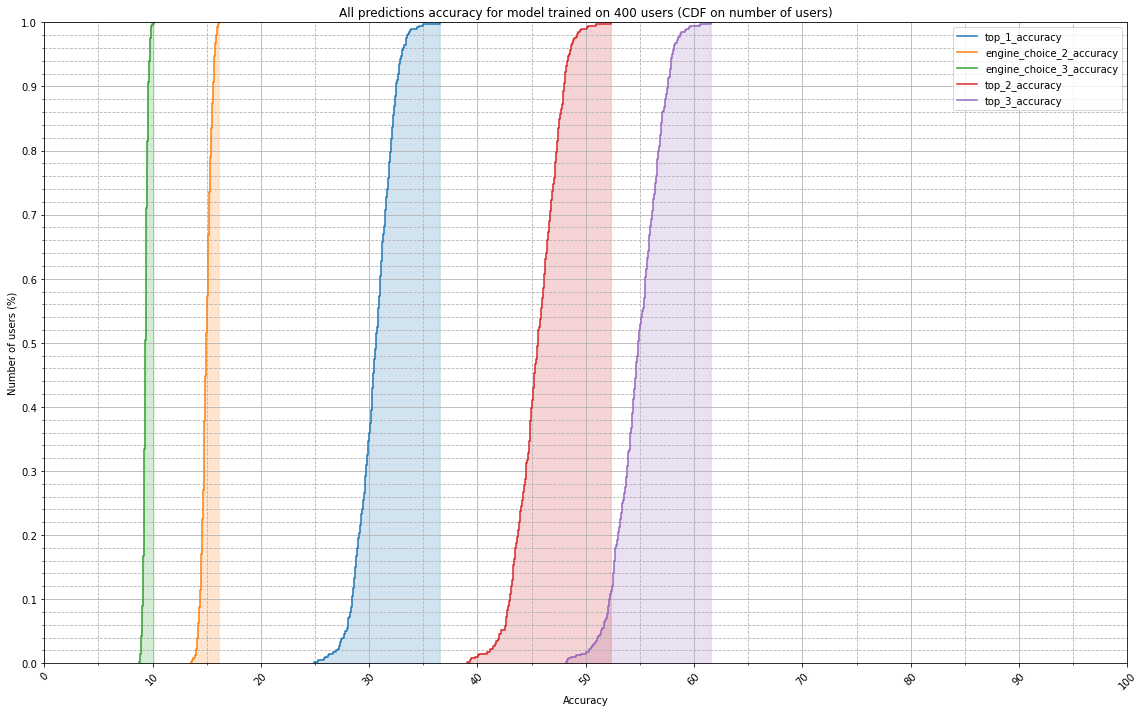

In [31]:
%matplotlib inline
plot_cdf_multiple_users(model_stats_df, all_acc_stats)

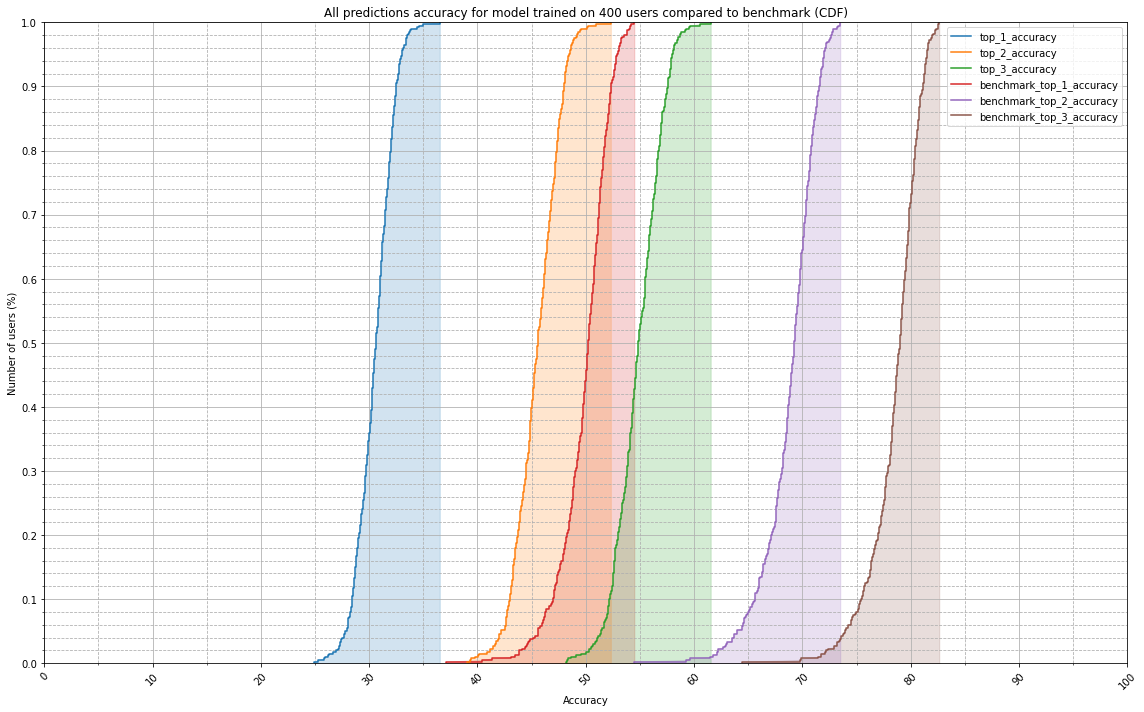

In [32]:
%matplotlib inline
plot_cdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        top_k_acc + top_k_acc_bench,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark (CDF)"))

### All guesses accuracy (Boxplot)

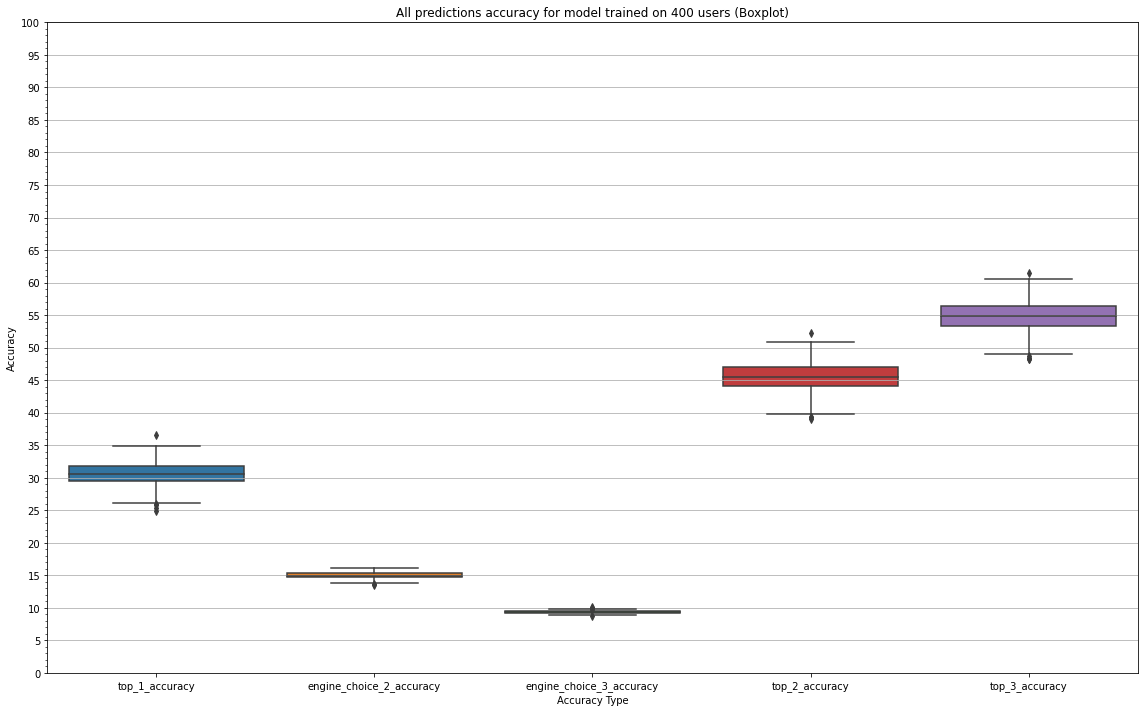

In [33]:
%matplotlib inline
plot_boxplot_multiple_users(model_stats_df, all_acc_stats)

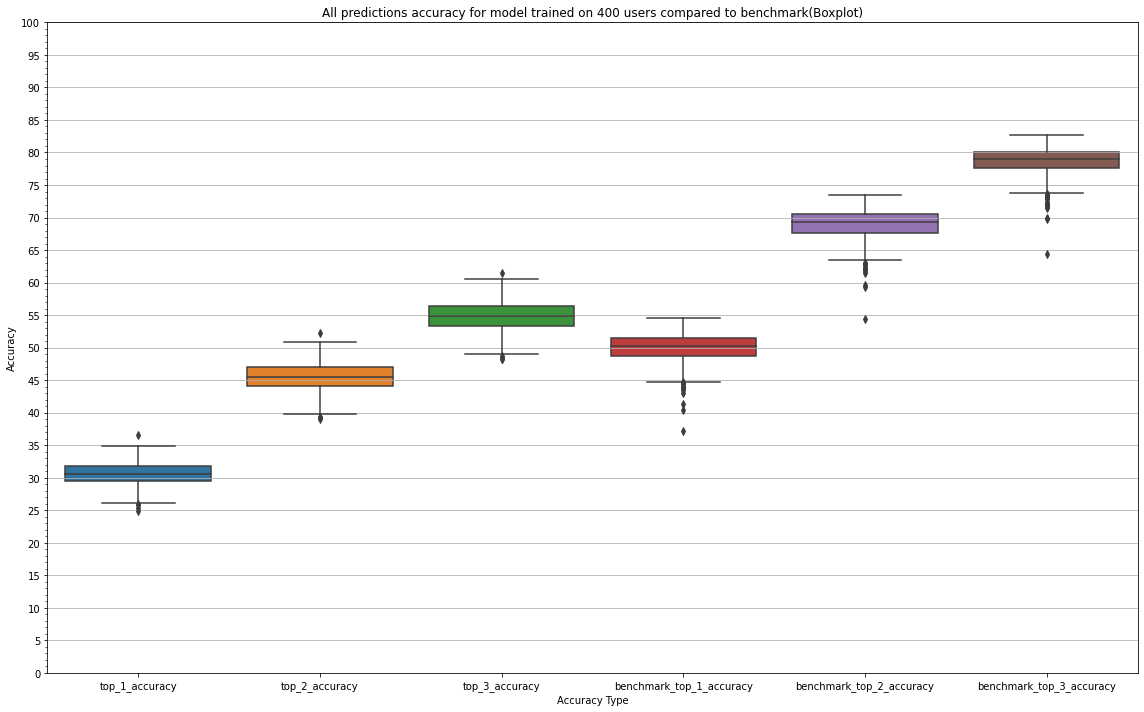

In [34]:
%matplotlib inline
plot_boxplot_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                            top_k_acc + top_k_acc_bench,
                            title=("All predictions accuracy for model trained on "
                                   f"{len(model_stats_df)} users compared to benchmark(Boxplot)"))

## Accuracy by turn

### Accuracy by turn (single user)

In [35]:
model_turn_df = get_stats_for_predictions_by_turn(dt_pred_folder, pred_files_model, data_folder)
# display(model_turn_df.head())

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [28:30<00:00,  4.28s/it]


In [36]:
bench_turn_df = get_stats_for_predictions_by_turn(benchmark_pred_folder, bench_pred_files_model,
                                                  data_folder, split_type=split_data)
# display(bench_turn_df.head())

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [28:54<00:00,  4.34s/it]


#### First trained user

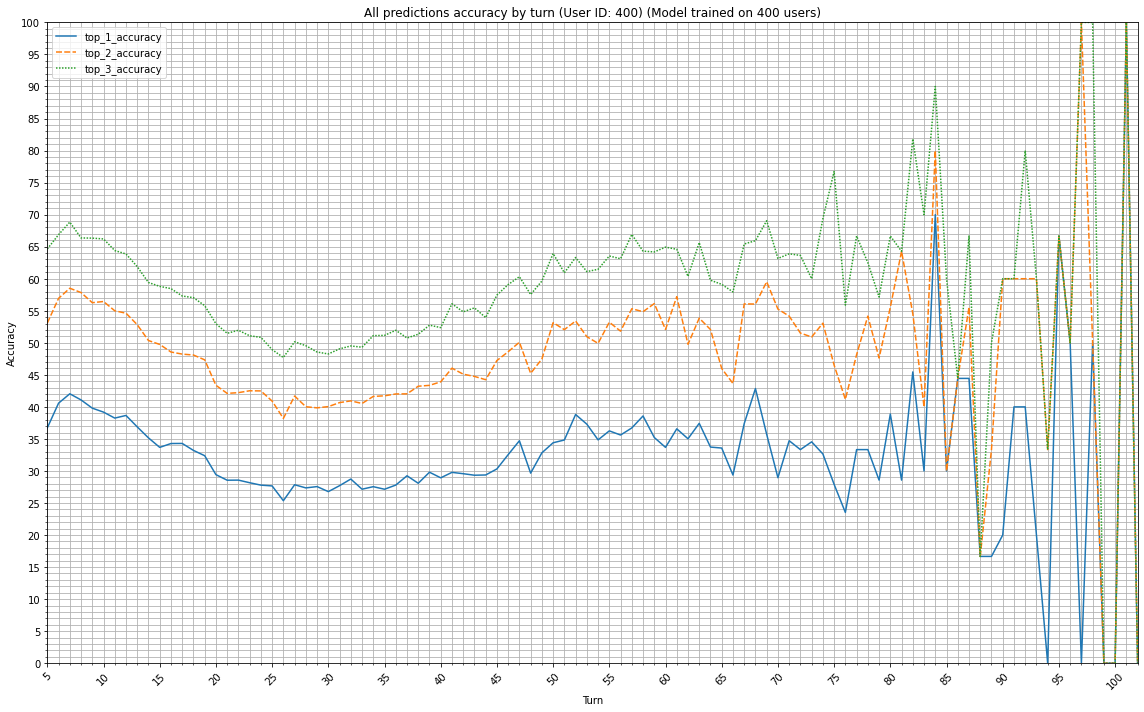

In [37]:
i, _ = (0, 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

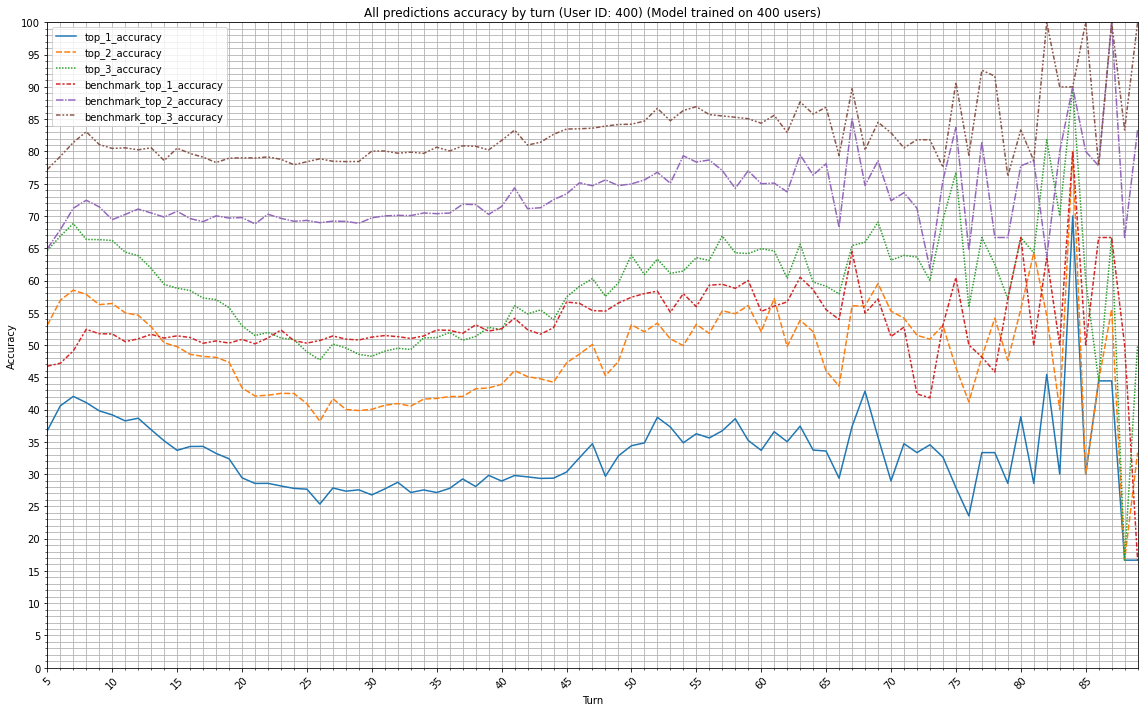

In [65]:
i, turn_cap = (0, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

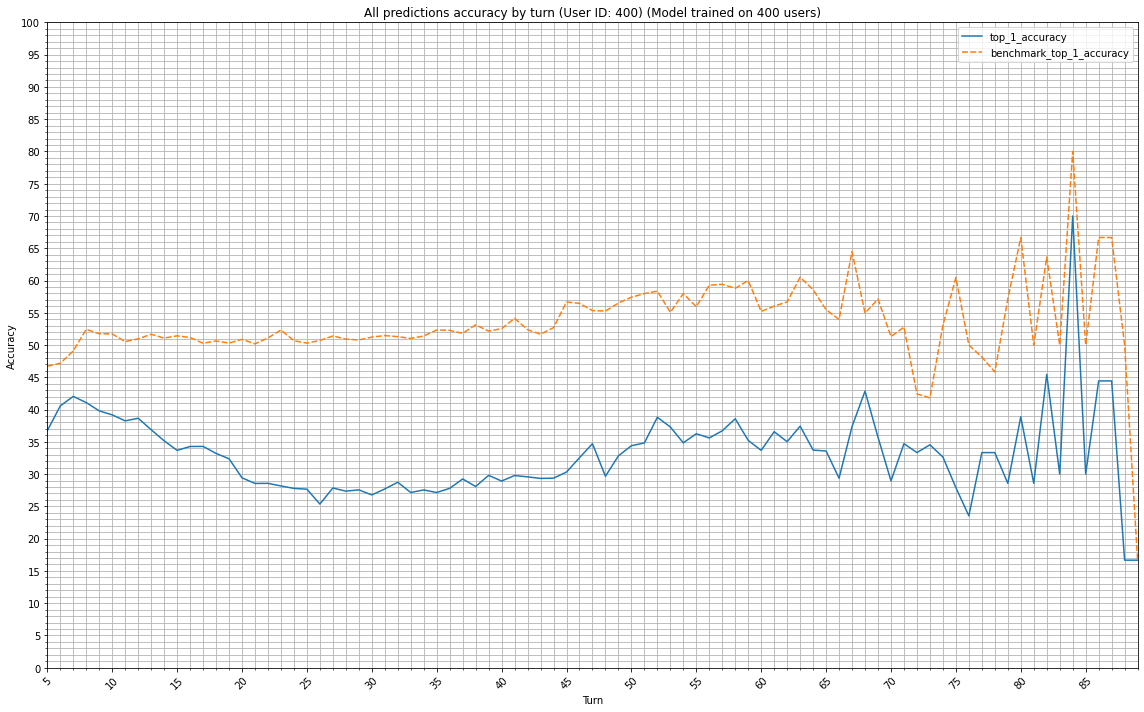

In [66]:
i, turn_cap = (0, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

#### Mid-point trained user

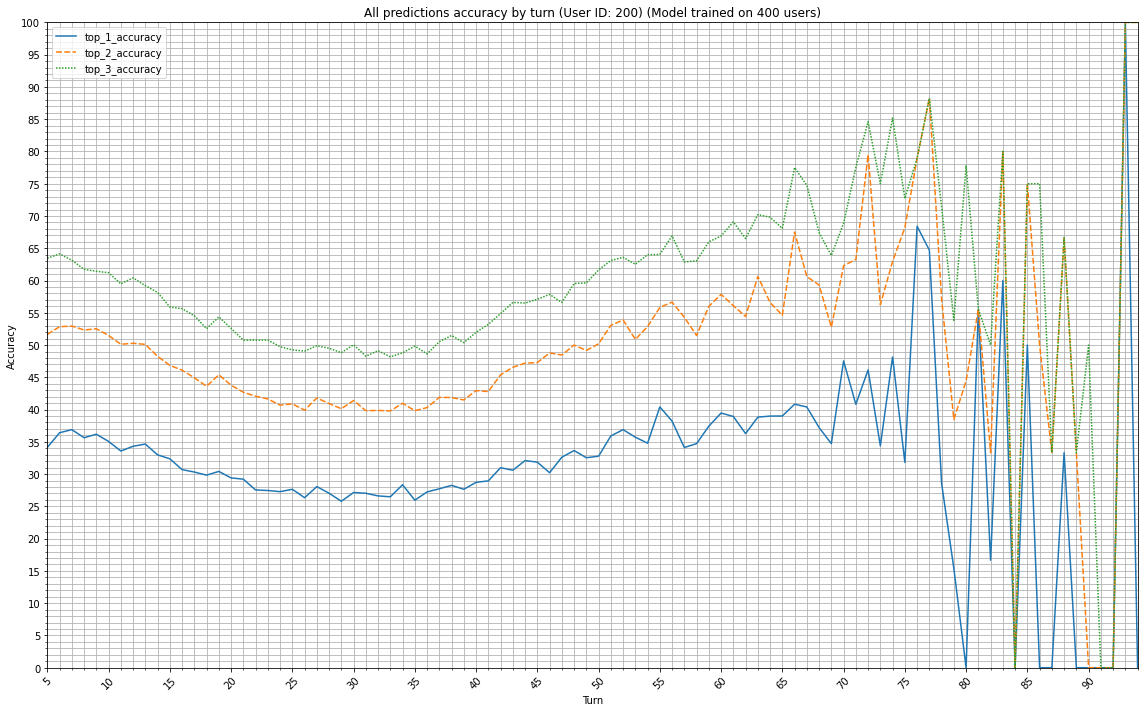

In [67]:
i, _ = (int(len(pred_files_model)/2), 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

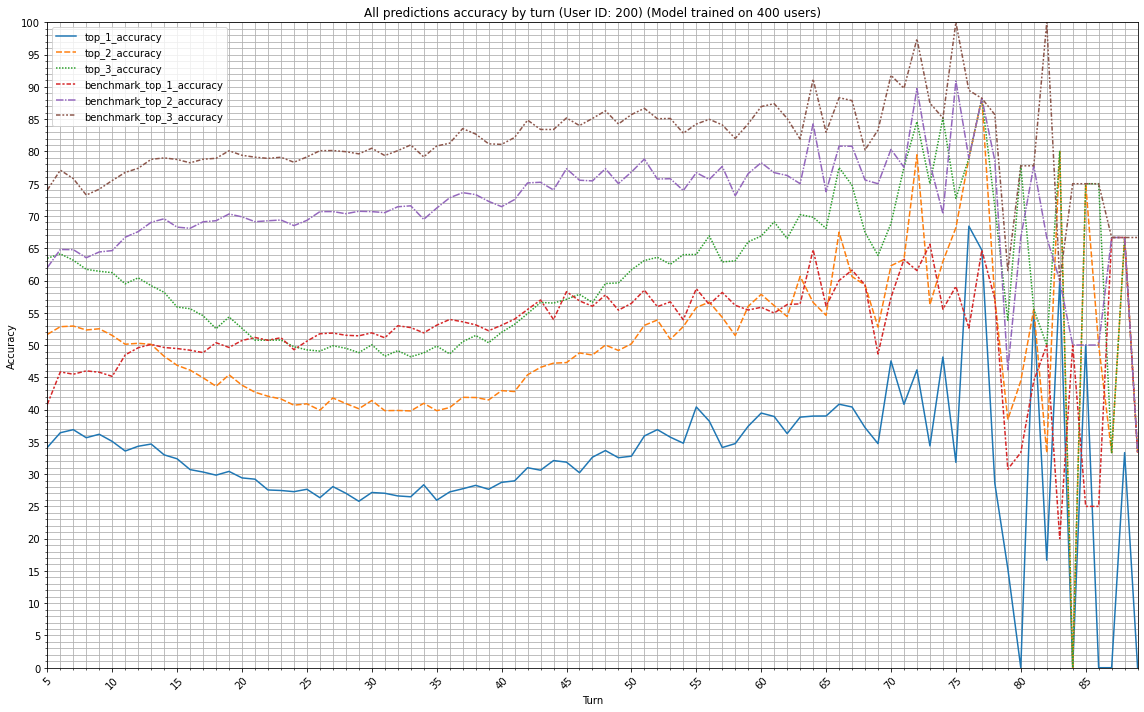

In [68]:
i, turn_cap = (int(len(pred_files_model)/2), 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

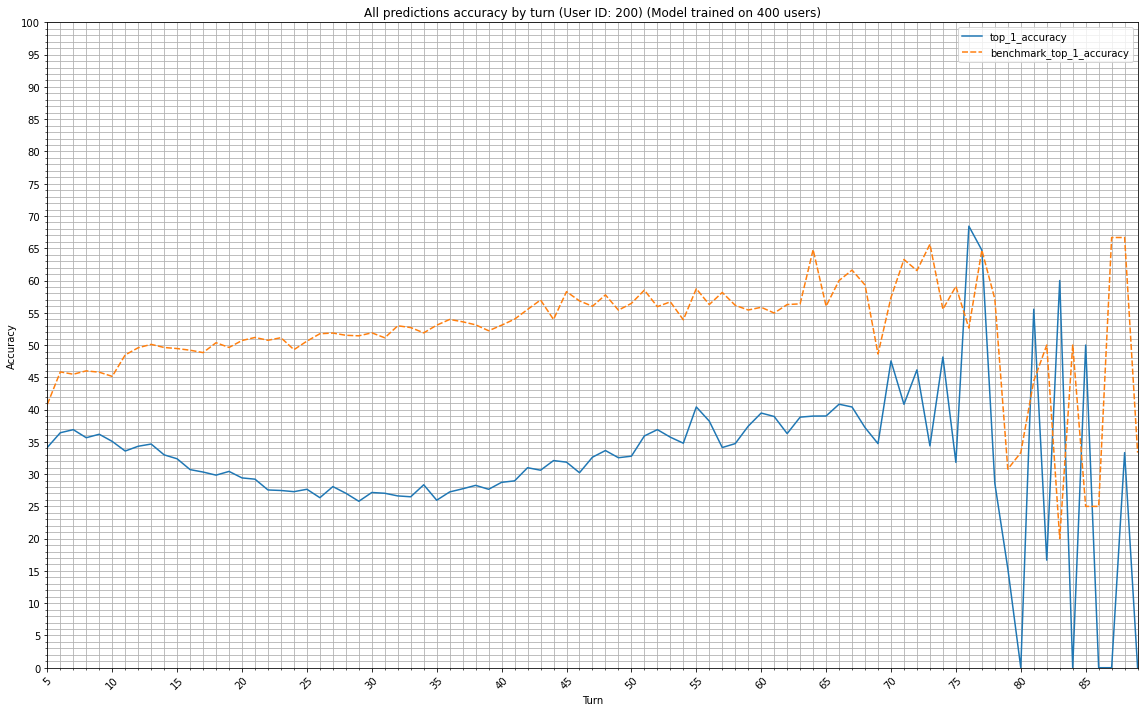

In [69]:
i, turn_cap = (int(len(pred_files_model)/2), 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

#### Last trained user

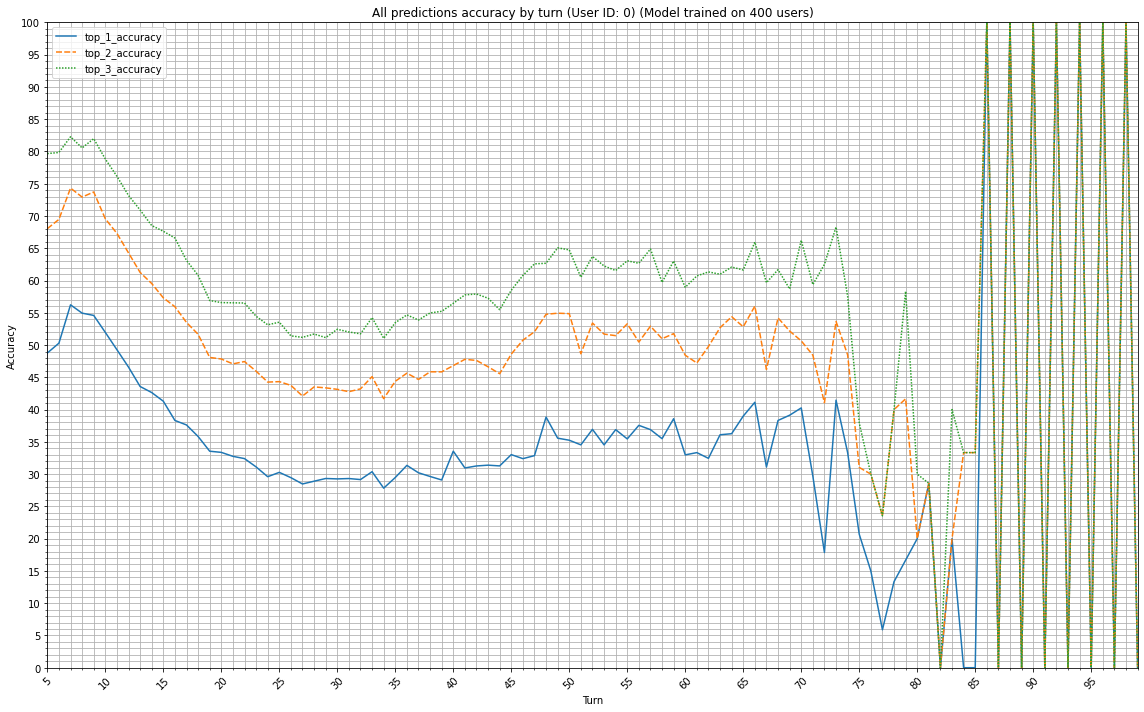

In [70]:
i, _ = (-1, 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

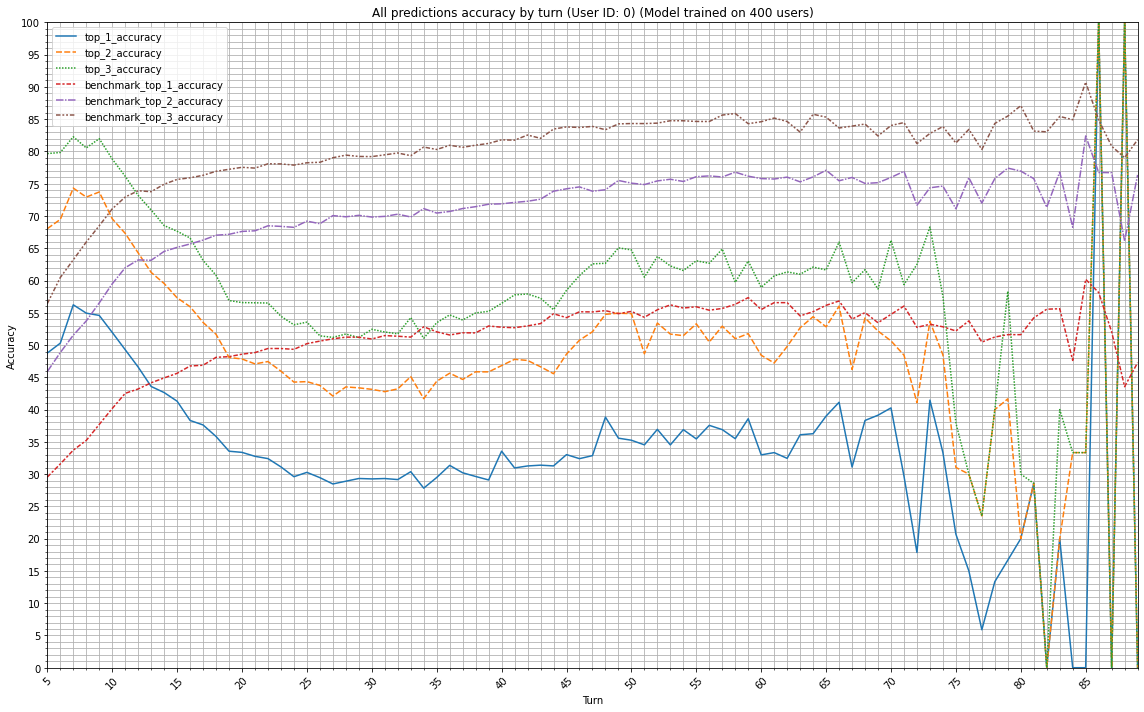

In [71]:
i, turn_cap = (-1, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

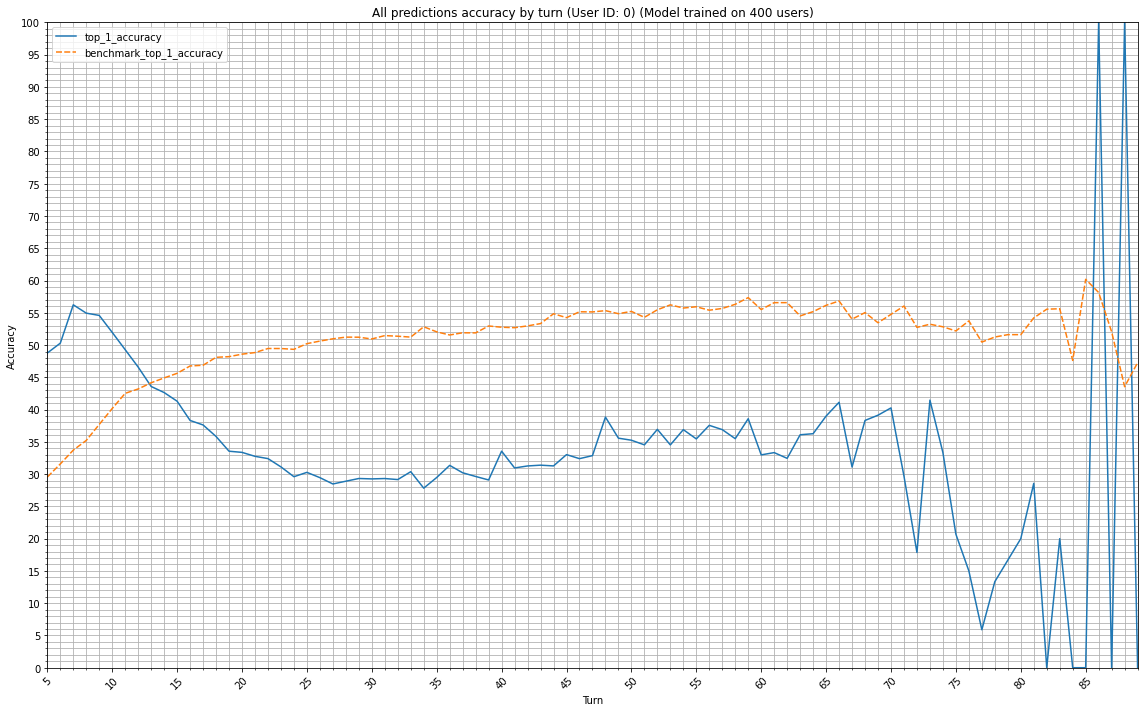

In [72]:
i, turn_cap = (-1, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for j in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[j]:all_acc_stats_bench[j]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

### Accuracy by turn (mean of all users)

In [46]:
model_turn_all_df = get_mean_of_predictions_by_turn(model_turn_df, all_acc_stats)
bench_turn_all_df = get_mean_of_predictions_by_turn(bench_turn_df, all_acc_stats)
for i in range(len(all_acc_stats)):
    bench_turn_all_df = bench_turn_all_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
# display(bench_turn_all_df.head())

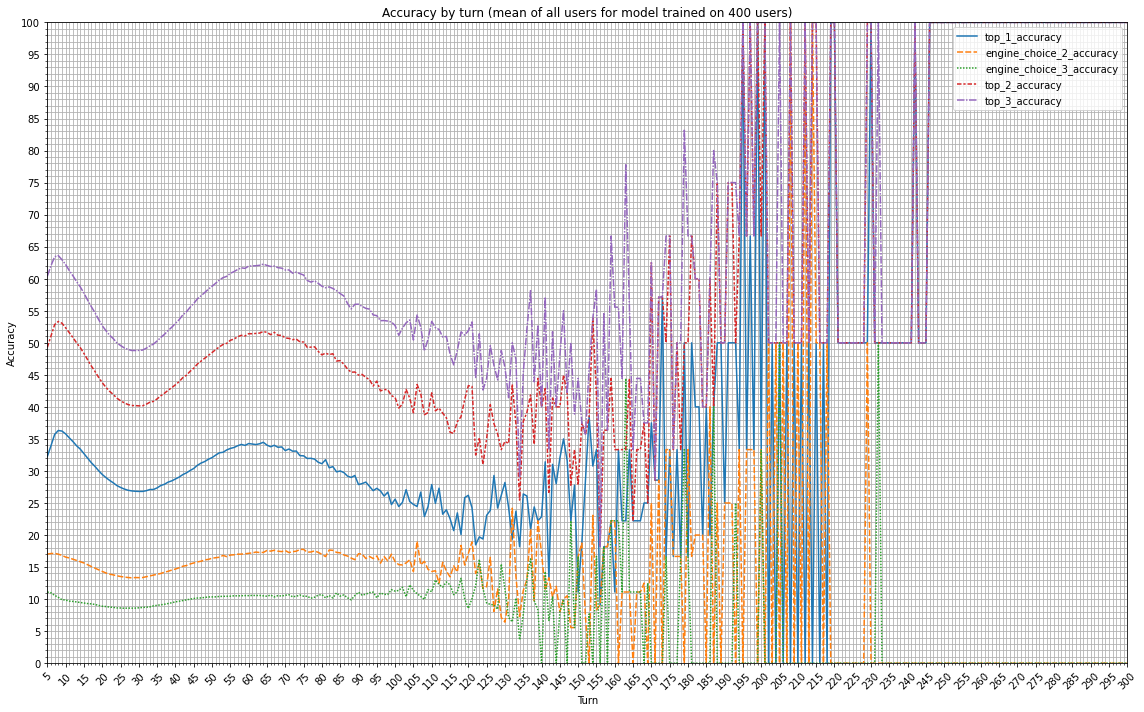

In [47]:
plot_single_acc_by_turn(model_turn_all_df[all_acc_stats],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

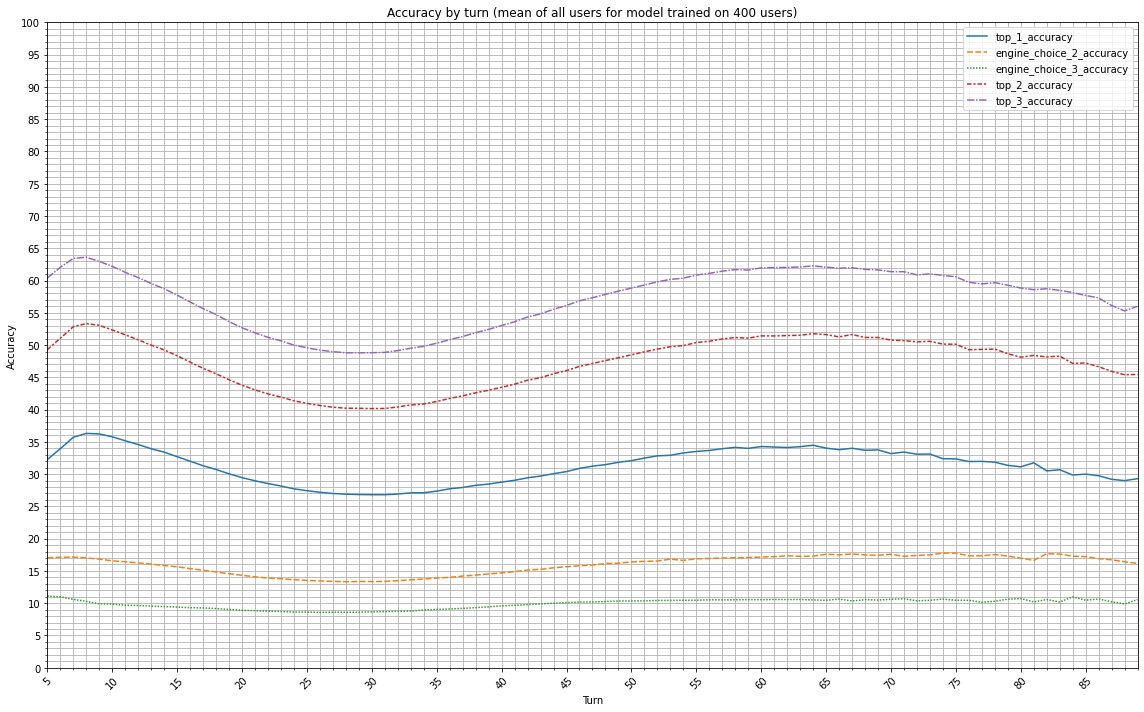

In [48]:
plot_single_acc_by_turn(model_turn_all_df[all_acc_stats][:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

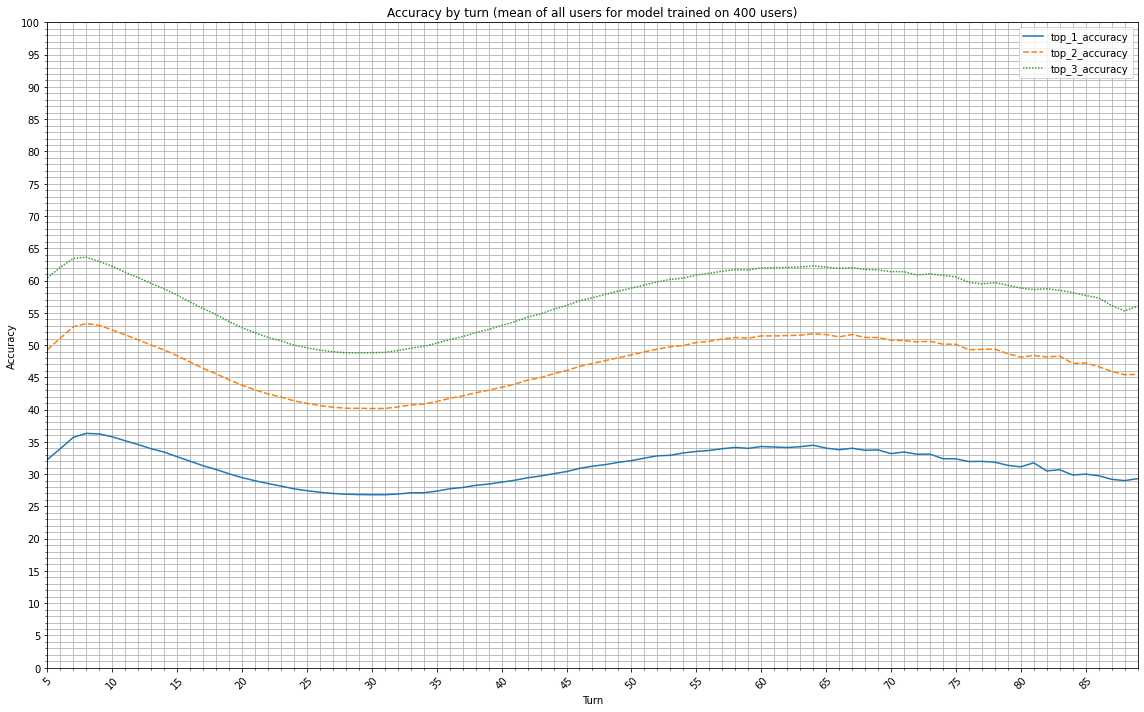

In [49]:
plot_single_acc_by_turn(model_turn_all_df[top_k_acc][:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

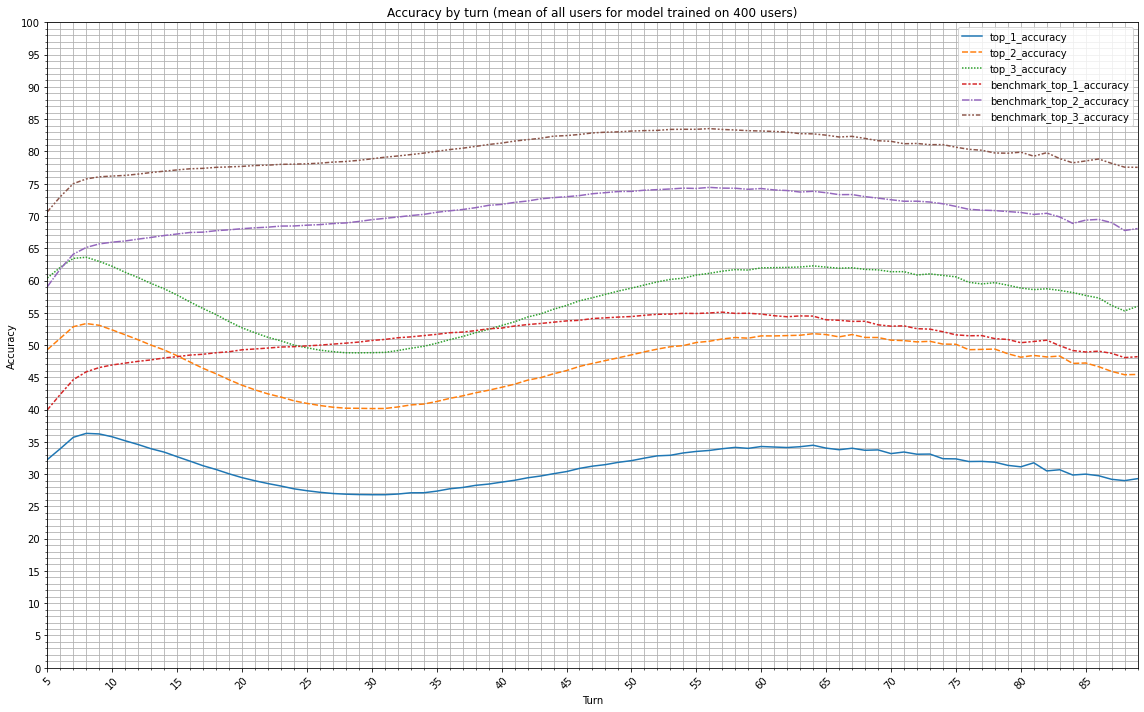

In [50]:
plot_single_acc_by_turn(pd.concat([model_turn_all_df[top_k_acc],
                                   bench_turn_all_df[top_k_acc_bench]], axis=1)[:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

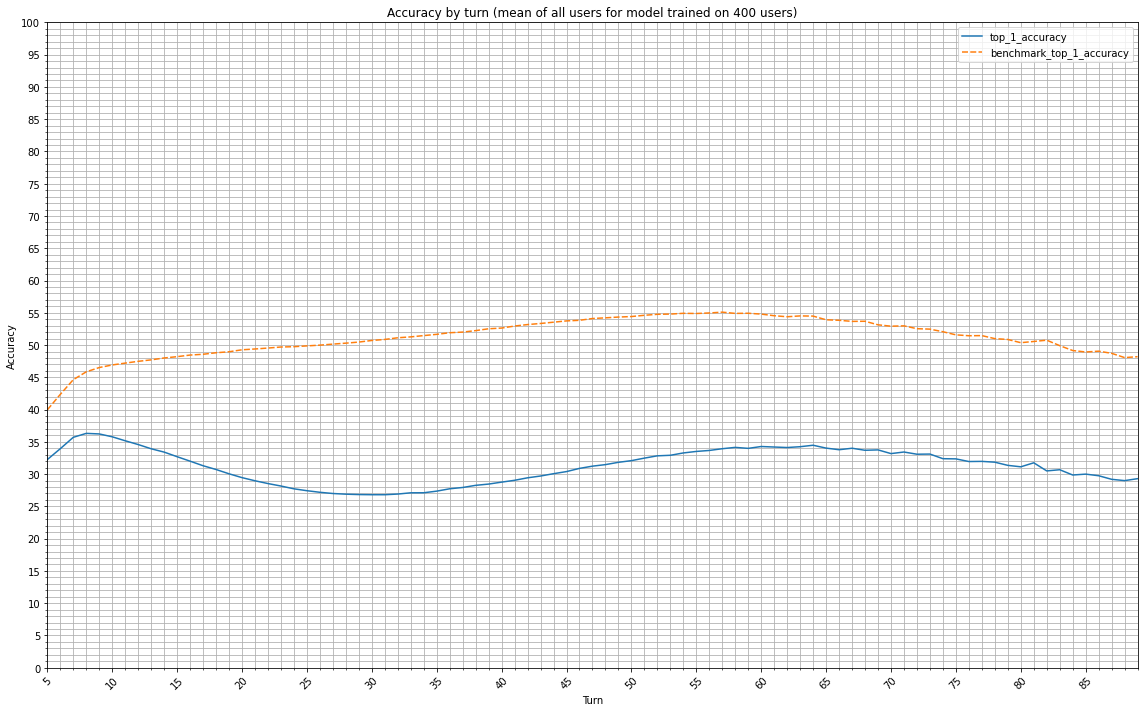

In [51]:
plot_single_acc_by_turn(pd.concat([model_turn_all_df[top_k_acc[0]],
                                   bench_turn_all_df[top_k_acc_bench[0]]], axis=1)[:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

## Accuracy by game stages

In [52]:
idx_separate = [15, 40, 100]
df_opening, df_middle, df_end = get_predictions_by_game_stage_from_turn(model_turn_df, idx_separate, all_acc_stats)
_, _, df_end_uncapped = get_predictions_by_game_stage_from_turn(model_turn_df, idx_separate[:2], all_acc_stats)
df_opening_bench, df_middle_bench, df_end_bench = get_predictions_by_game_stage_from_turn(bench_turn_df,
                                                                                          idx_separate,
                                                                                          all_acc_stats)
_, _, df_end_uncapped_bench = get_predictions_by_game_stage_from_turn(bench_turn_df, idx_separate[:2],
                                                                      all_acc_stats)
for i in range(len(all_acc_stats)):
    df_opening_bench = df_opening_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_middle_bench = df_middle_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_bench = df_end_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_uncapped_bench = df_end_uncapped_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})

### Opening accuracy

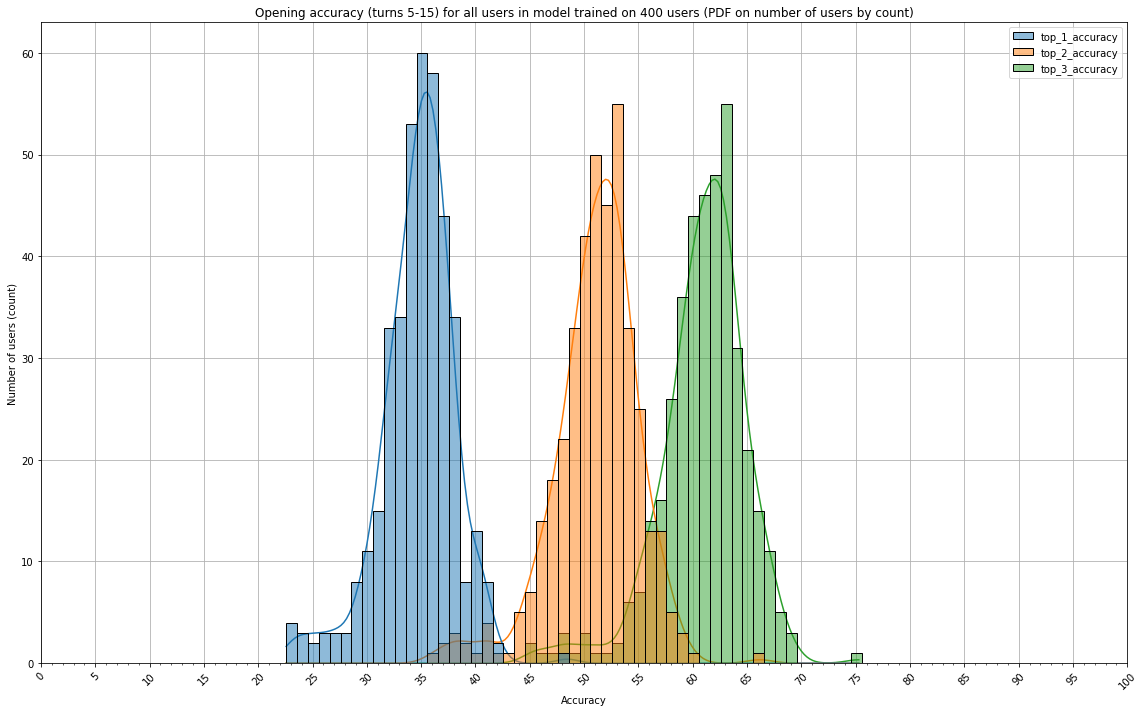

In [53]:
%matplotlib inline
plot_pdf_multiple_users(df_opening, top_k_acc, hist_stat=hist_stat,
                        title=(f"Opening accuracy (turns 5-{idx_separate[0]}) for all users "
                               f"in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

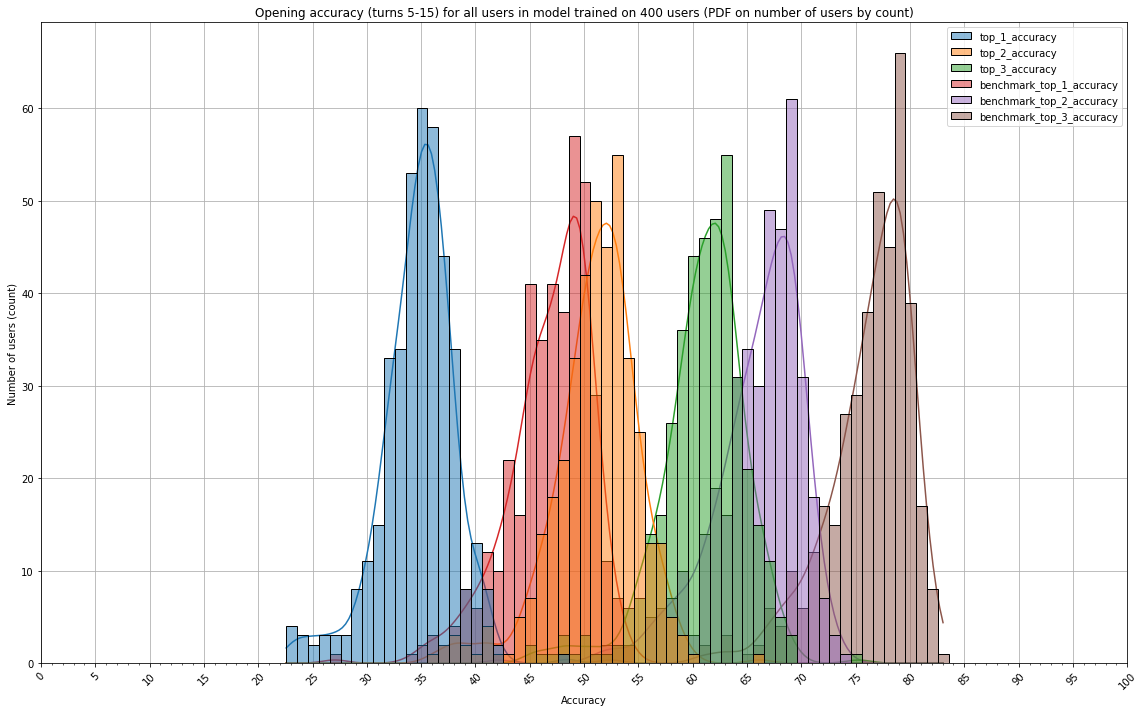

In [54]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_opening, df_opening_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat, title=(f"Opening accuracy (turns 5-{idx_separate[0]}) "
                                                    f"for all users in model trained on {len(model_stats_df)}"
                                                    f" users (PDF on number of users by {hist_stat})"))

### Middlegame accuracy

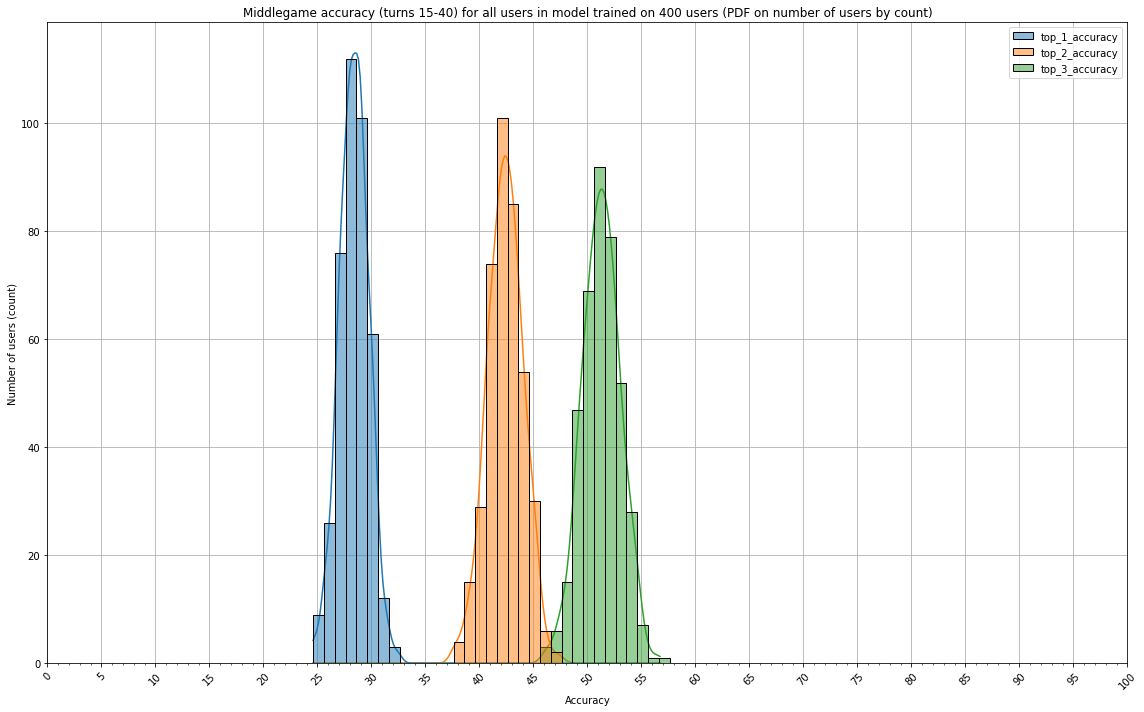

In [55]:
%matplotlib inline
plot_pdf_multiple_users(df_middle, top_k_acc, hist_stat=hist_stat,
                        title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

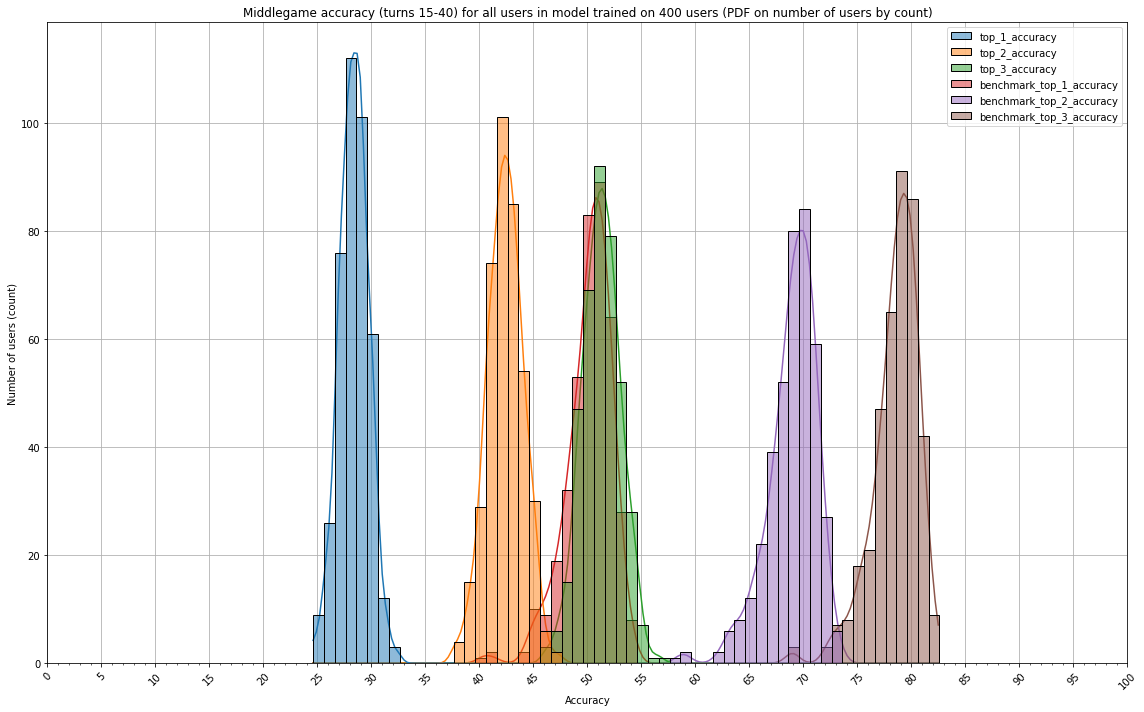

In [56]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_middle, df_middle_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat,
                        title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Endgame accuracy (Upper limit at 100 turns)

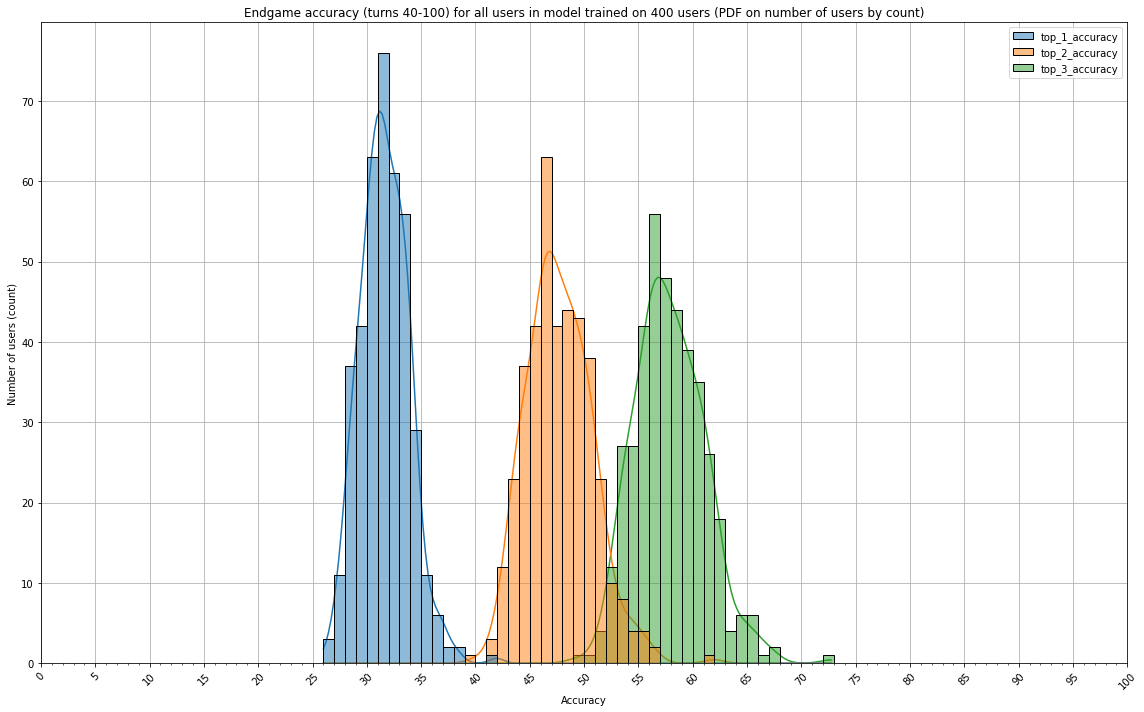

In [57]:
%matplotlib inline
plot_pdf_multiple_users(df_end, top_k_acc, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

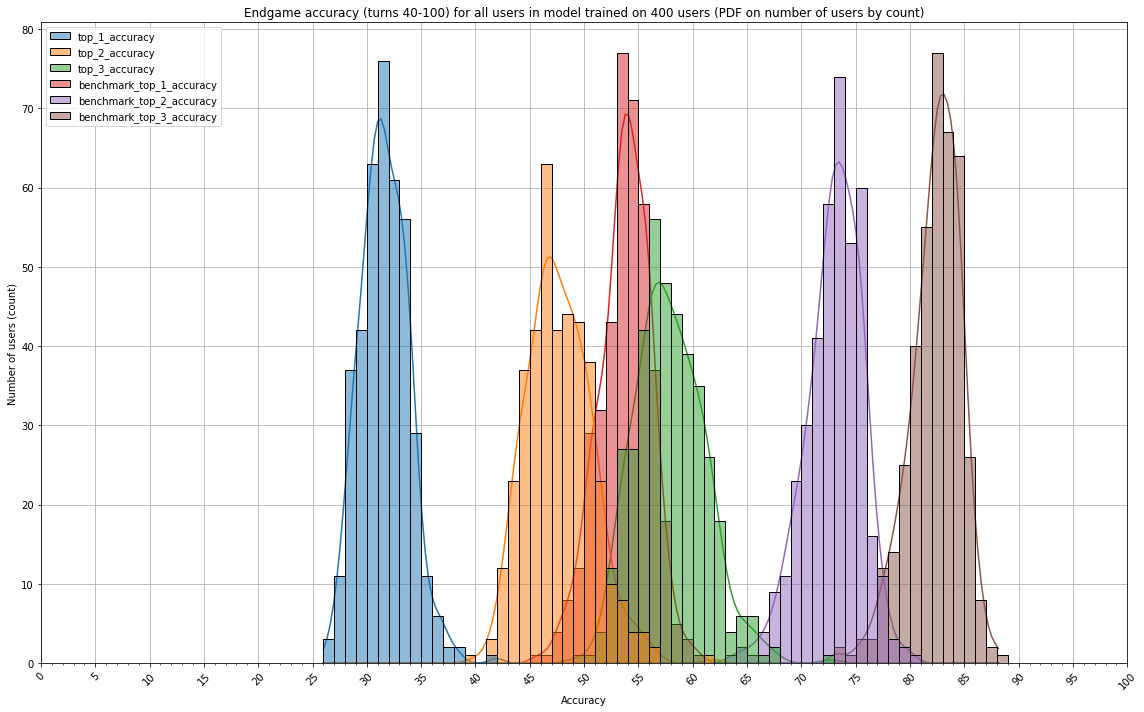

In [58]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_end, df_end_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat,
                        title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Endgame accuracy (No upper limit for turns)

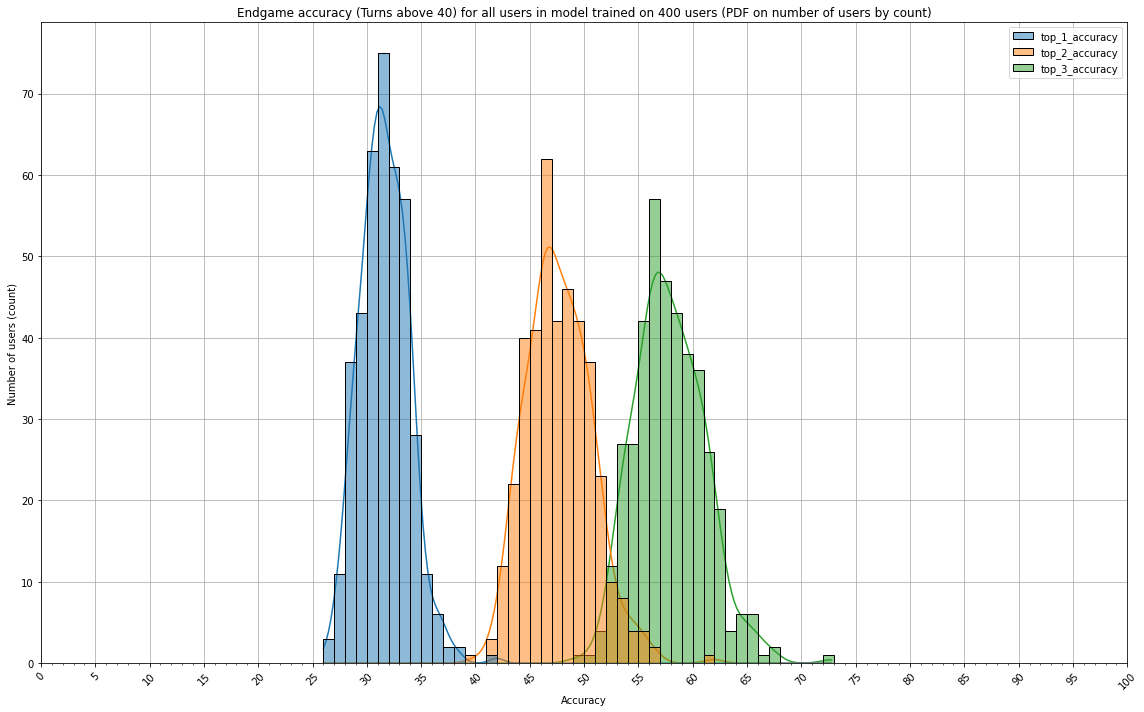

In [59]:
%matplotlib inline
plot_pdf_multiple_users(df_end_uncapped, top_k_acc, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

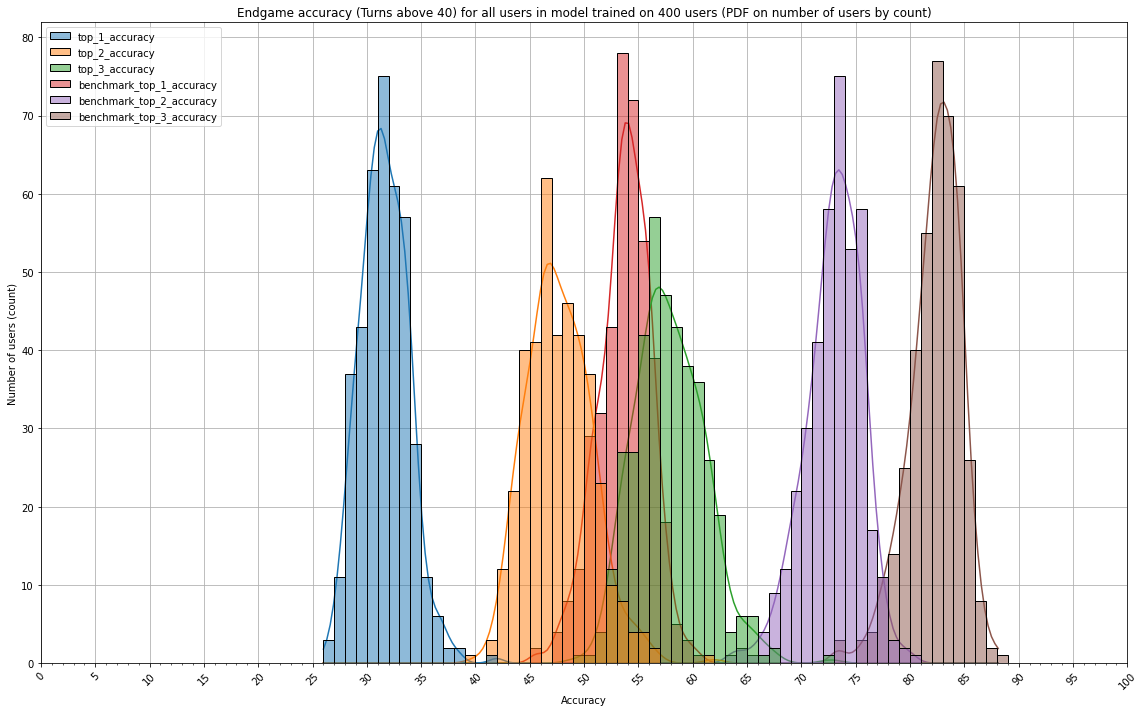

In [60]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_end_uncapped, df_end_uncapped_bench], axis=1),
                        top_k_acc + top_k_acc_bench, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Game stages comparison (Boxplot)

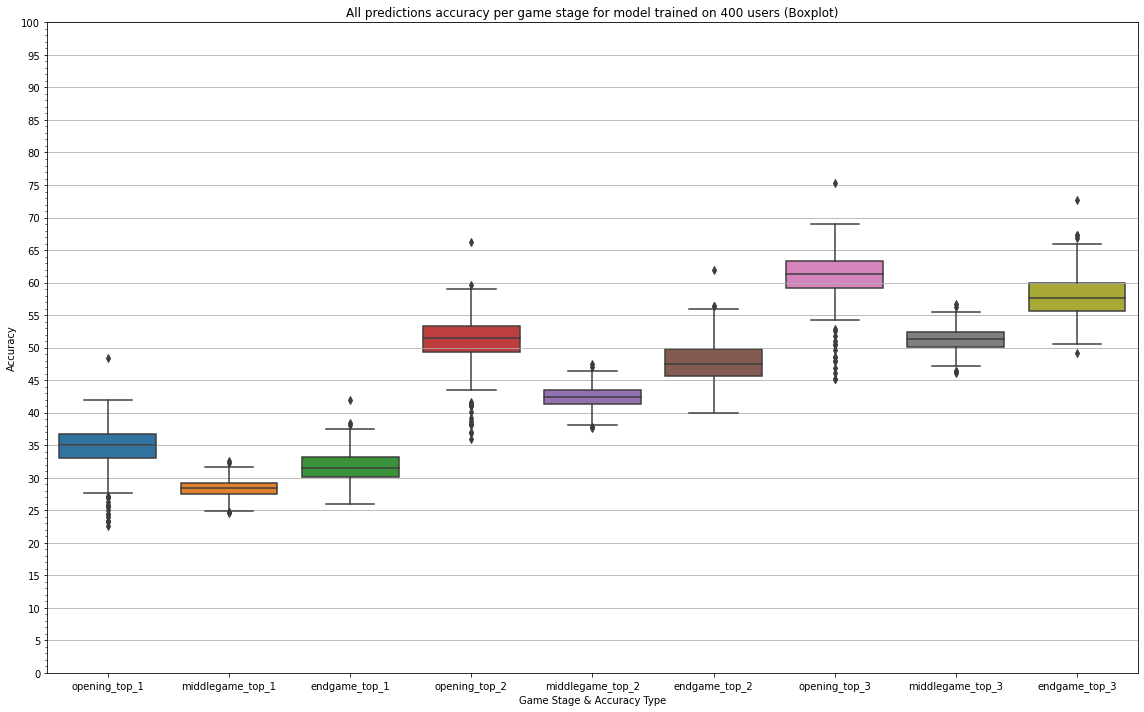

In [61]:
%matplotlib inline
boxplot_game_stages(df_opening, df_middle, df_end)

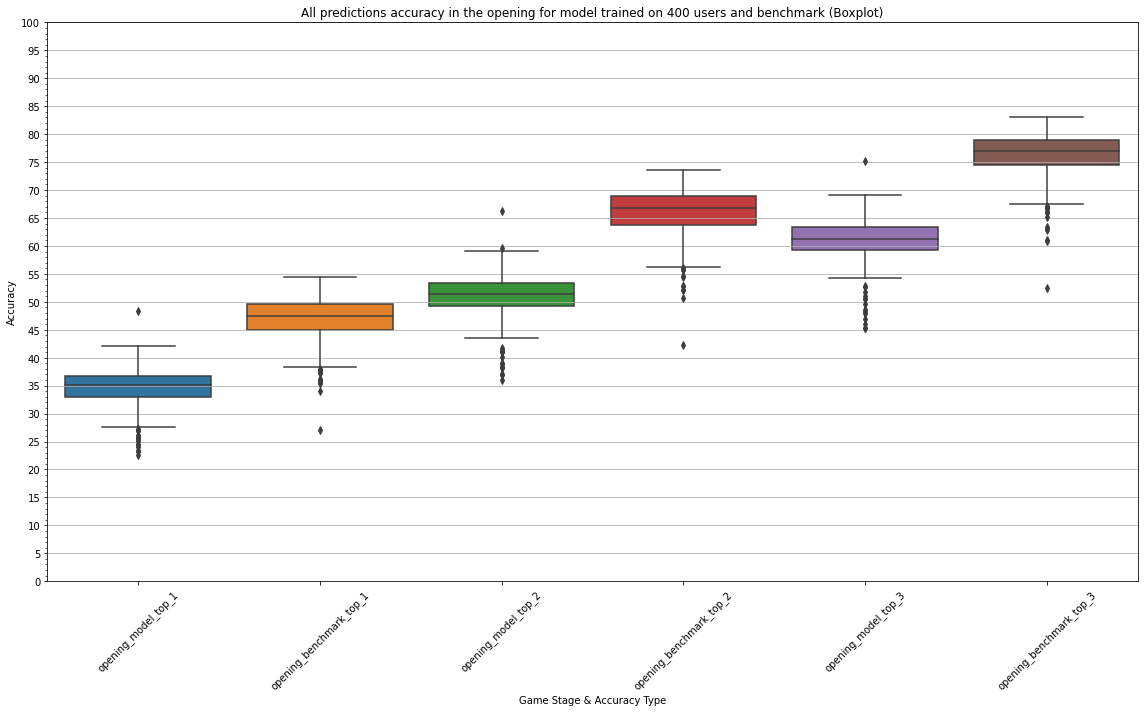

In [62]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_opening, df_opening_bench, 'opening')

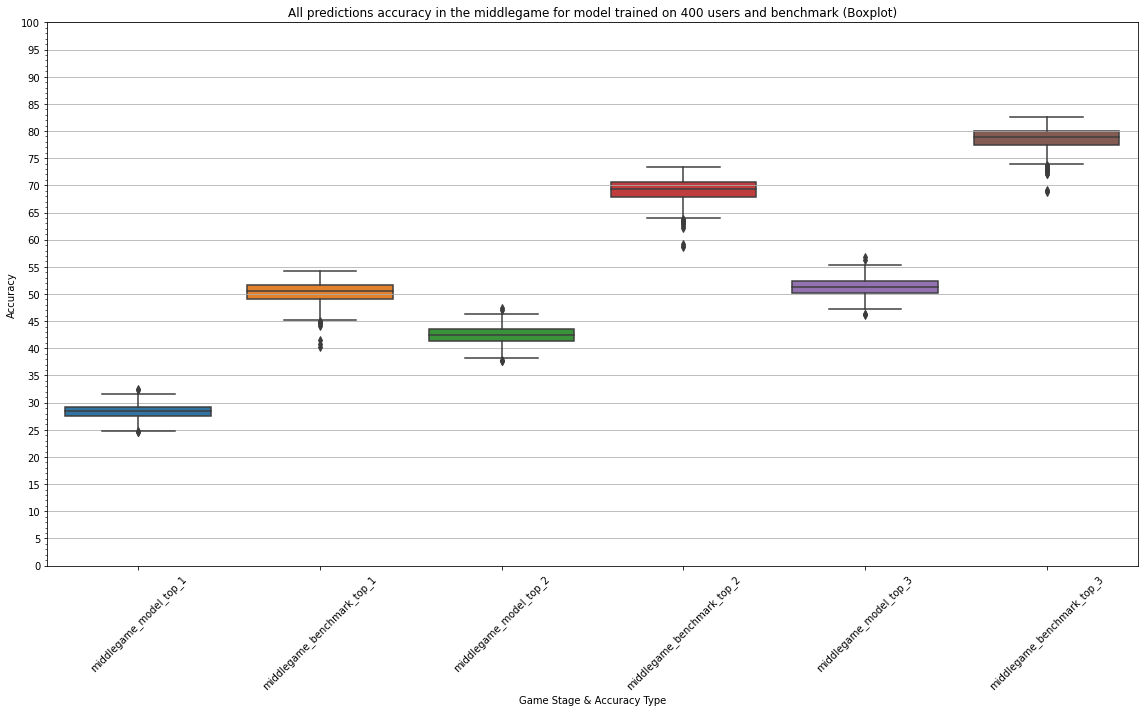

In [63]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_middle, df_middle_bench, 'middlegame')

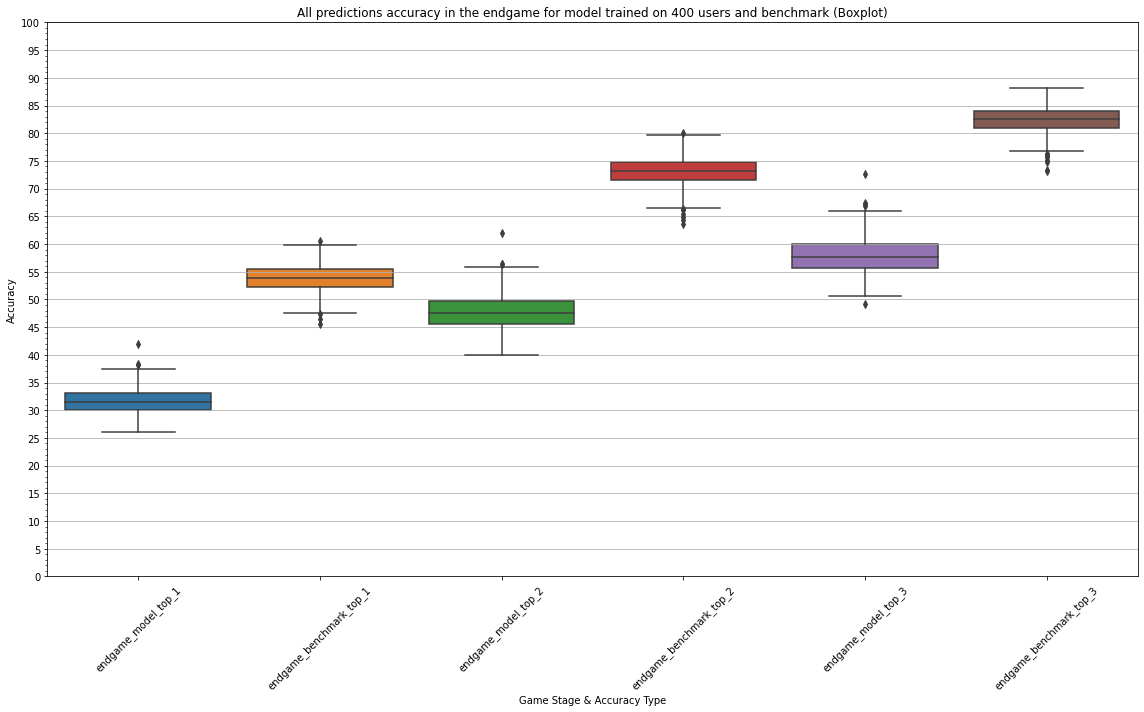

In [64]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_end, df_end_bench, 'endgame')